In [20]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from numpy import random

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

# For Correlated Ancillae

In [21]:
def corr(q, c, system, ancillae, g, t, i):
    coA = QuantumCircuit(q,c)
    
    # State Preparation
    coA.h(q[system])
    coA.h(q[ancillae[2]])
    coA.cnot(q[ancillae[2]],q[ancillae[1]])
    coA.cnot(q[ancillae[2]],q[ancillae[0]])
    
    # Collisions between the system and ancilla qubits
    for j in range(1, i+1, 1):
        if j%2 != 0:
            coA.cnot(q[ancillae[0]],q[system])
            coA.rz(t, q[system])
            coA.cnot(q[ancillae[0]],q[system])
        else:
            coA.cnot(q[ancillae[1]],q[system])
            coA.rz(t, q[system])
            coA.cnot(q[ancillae[1]],q[system])
    
    coA.h(q[system])
    
    coA.measure(q[system],c[0])
        
    return coA

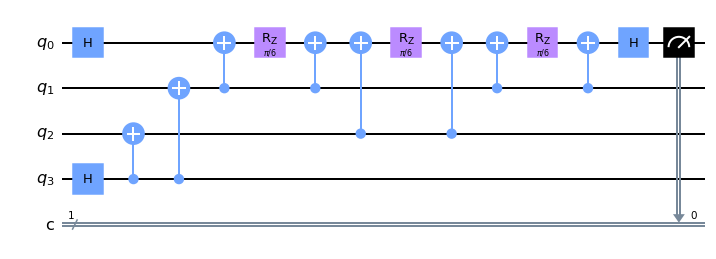

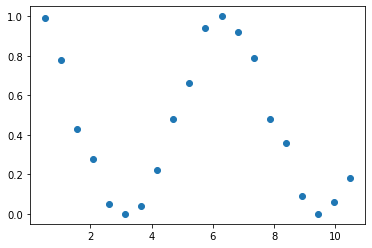

In [19]:
q = QuantumRegister(4,name = 'q')
c = ClassicalRegister(1, name = 'c')
system = 0
ancillae = [1, 2, 3]
rho_12, T = [], []
n = 20
tt = np.pi/6
g = 1
t = g*(tt)
for i in range(1,n+1,1):
    circ = corr(q, c, system, ancillae, g, tt, i)
    if i == 3:
        qq = circ
    T.append(i*t)
    job = qiskit.execute(circ, Aer.get_backend('qasm_simulator'), shots=100)
    counts = job.result().get_counts()
    rho_12.append(counts.get('0',0)/(counts.get('0',0)+counts.get('1',0)))
    
plt.scatter(T, np.real(rho_12))
qq.draw(output="mpl")

# For Uncorrelated Ancillae

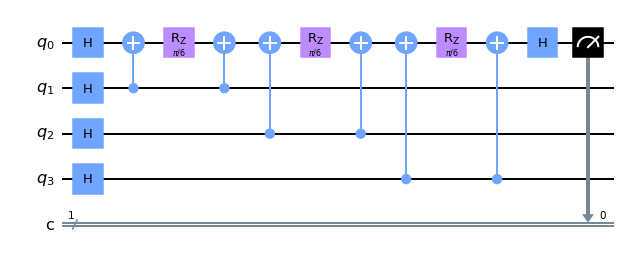

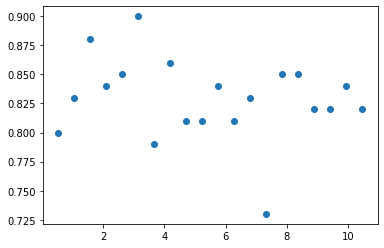

In [29]:
q = QuantumRegister(4,name = 'q')
c = ClassicalRegister(1, name = 'c')
system = 0
ancillae = [1, 2, 3]
rho_12, T = [], []
n = 20
tt = np.pi/6
g = 1
t = g*(tt)
for i in range(1,n+1,1):
    circ = uncorr(q, c, system, ancillae, g, tt, i)
    if i == 3:
        qq = circ
    T.append(i*t)
    job = qiskit.execute(circ, Aer.get_backend('qasm_simulator'), shots=100)
    counts = job.result().get_counts()
    rho_12.append(counts.get('0',0)/(counts.get('0',0)+counts.get('1',0)))
    
plt.scatter(T, np.real(rho_12))
qq.draw(output="mpl")